1. Neutral Network (VG-Exercise)

Exercise 1b: Fashion MNIST analysis and further extension

We don't use [256,256,256] because although it gets higher test accuracy, but it has problem of overfitting and will not always get good test accuracy in different training set.

In [1]:
###    Import all the imports that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
###    Read the train data with pandas
data_train_mnist = pd.read_csv("fashion-mnist_train.csv")
###    Read the test data with pandas
data_test_mnist = pd.read_csv("fashion-mnist_test.csv")
###    normalise the training mnist data in the part of pixel integers
data_train_mnist_normal = data_train_mnist.iloc[:,1:] / 255
###    Save the label(in 0-9 format) as 'target'
target_training = data_train_mnist[['label']].iloc[:, :]
###    do the same thing for test mnist set
data_test_mnist_normal = data_test_mnist.iloc[:,1:] / 255
target_test = data_test_mnist[['label']].iloc[:, :]

In [3]:
# Manually set up the meaning of the labels from 0 to 9
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train=data_train_mnist_normal
Y_train=np.array(target_training).ravel()
X_test=data_test_mnist_normal
Y_test=np.array(target_test).ravel()

In [5]:
model = MLPClassifier(learning_rate="constant",learning_rate_init=0.001,hidden_layer_sizes=[30,30,30],activation="tanh",alpha=0.001,early_stopping=True,max_iter=500)
clf=model.fit(X_train,Y_train)
accuracy=clf.score(X_test,Y_test)
print(f"The test accuracy is: {accuracy}")

The test accuracy is: 0.8791


bullet point one:

In [6]:
from sklearn.metrics import confusion_matrix


y_probs = model.predict(X_test)
cm = confusion_matrix(Y_test,y_probs)

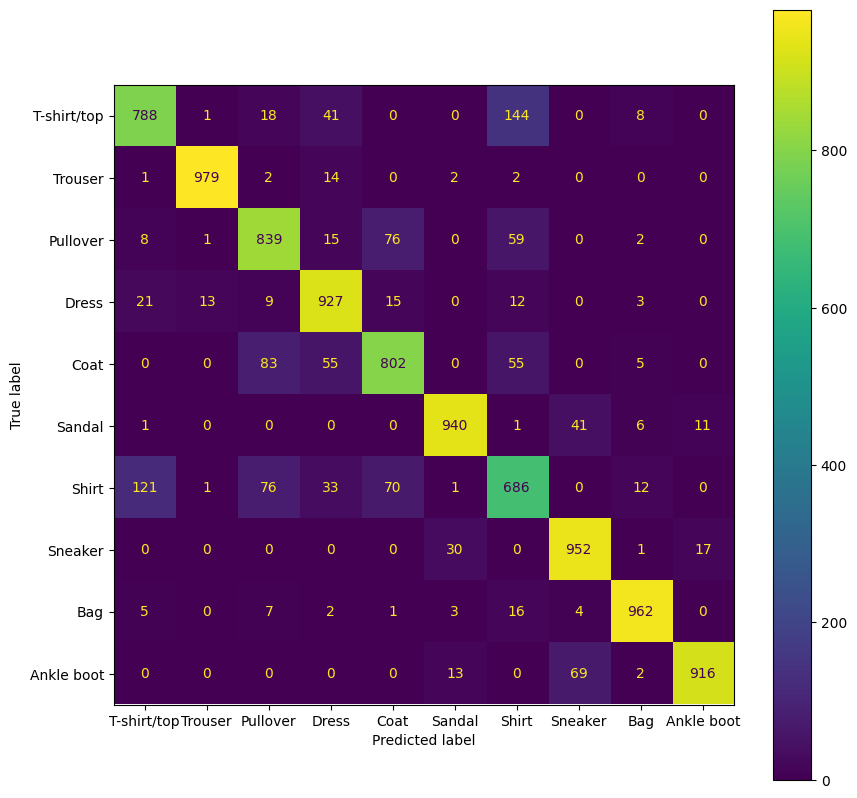

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
fig,ax=plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

We set one standard value to judge category easiness.

1. if the digonal value in confusion matrix is larger than 900, we define it as easy to classify.

2. if the digonal value in confusion matrix is smaller than 900, we define it as hard to classify.

So in a nutshell, Trouser, Sandal, Sneaker, Bag and Ankle boot are easy to classify.

So in a nutshell, T-shirt/top, Pullover, Dress, Coat and Shirt are hard to classify.

Now we see box with very large value to see the case of mixing together.

The most likely mixing together is T-shirt/top and Shirt.

Then in next level Coat is very likely mixing together with Pullover and Coat with Shirt also. Pullover is also likely mixing together with Shirt.

Then in final level Sneaker and Ankle boot is a little bit likely to mix together, also Sneaker and Sandal is a little bit likely to mix together.

We select the most likely mixing classes: T-shirt/top and Shirt

First: misclassify T-shirt/top as Shirt

In [8]:
num = 0
for i in range(len(X_test)):
    if y_probs[i] == 6 and Y_test[i] == 0:
        num+=1
print(f"There are {num} numbers of T-shirt/top misclassified as Shirt")

There are 144 numbers of T-shirt/top misclassified as Shirt


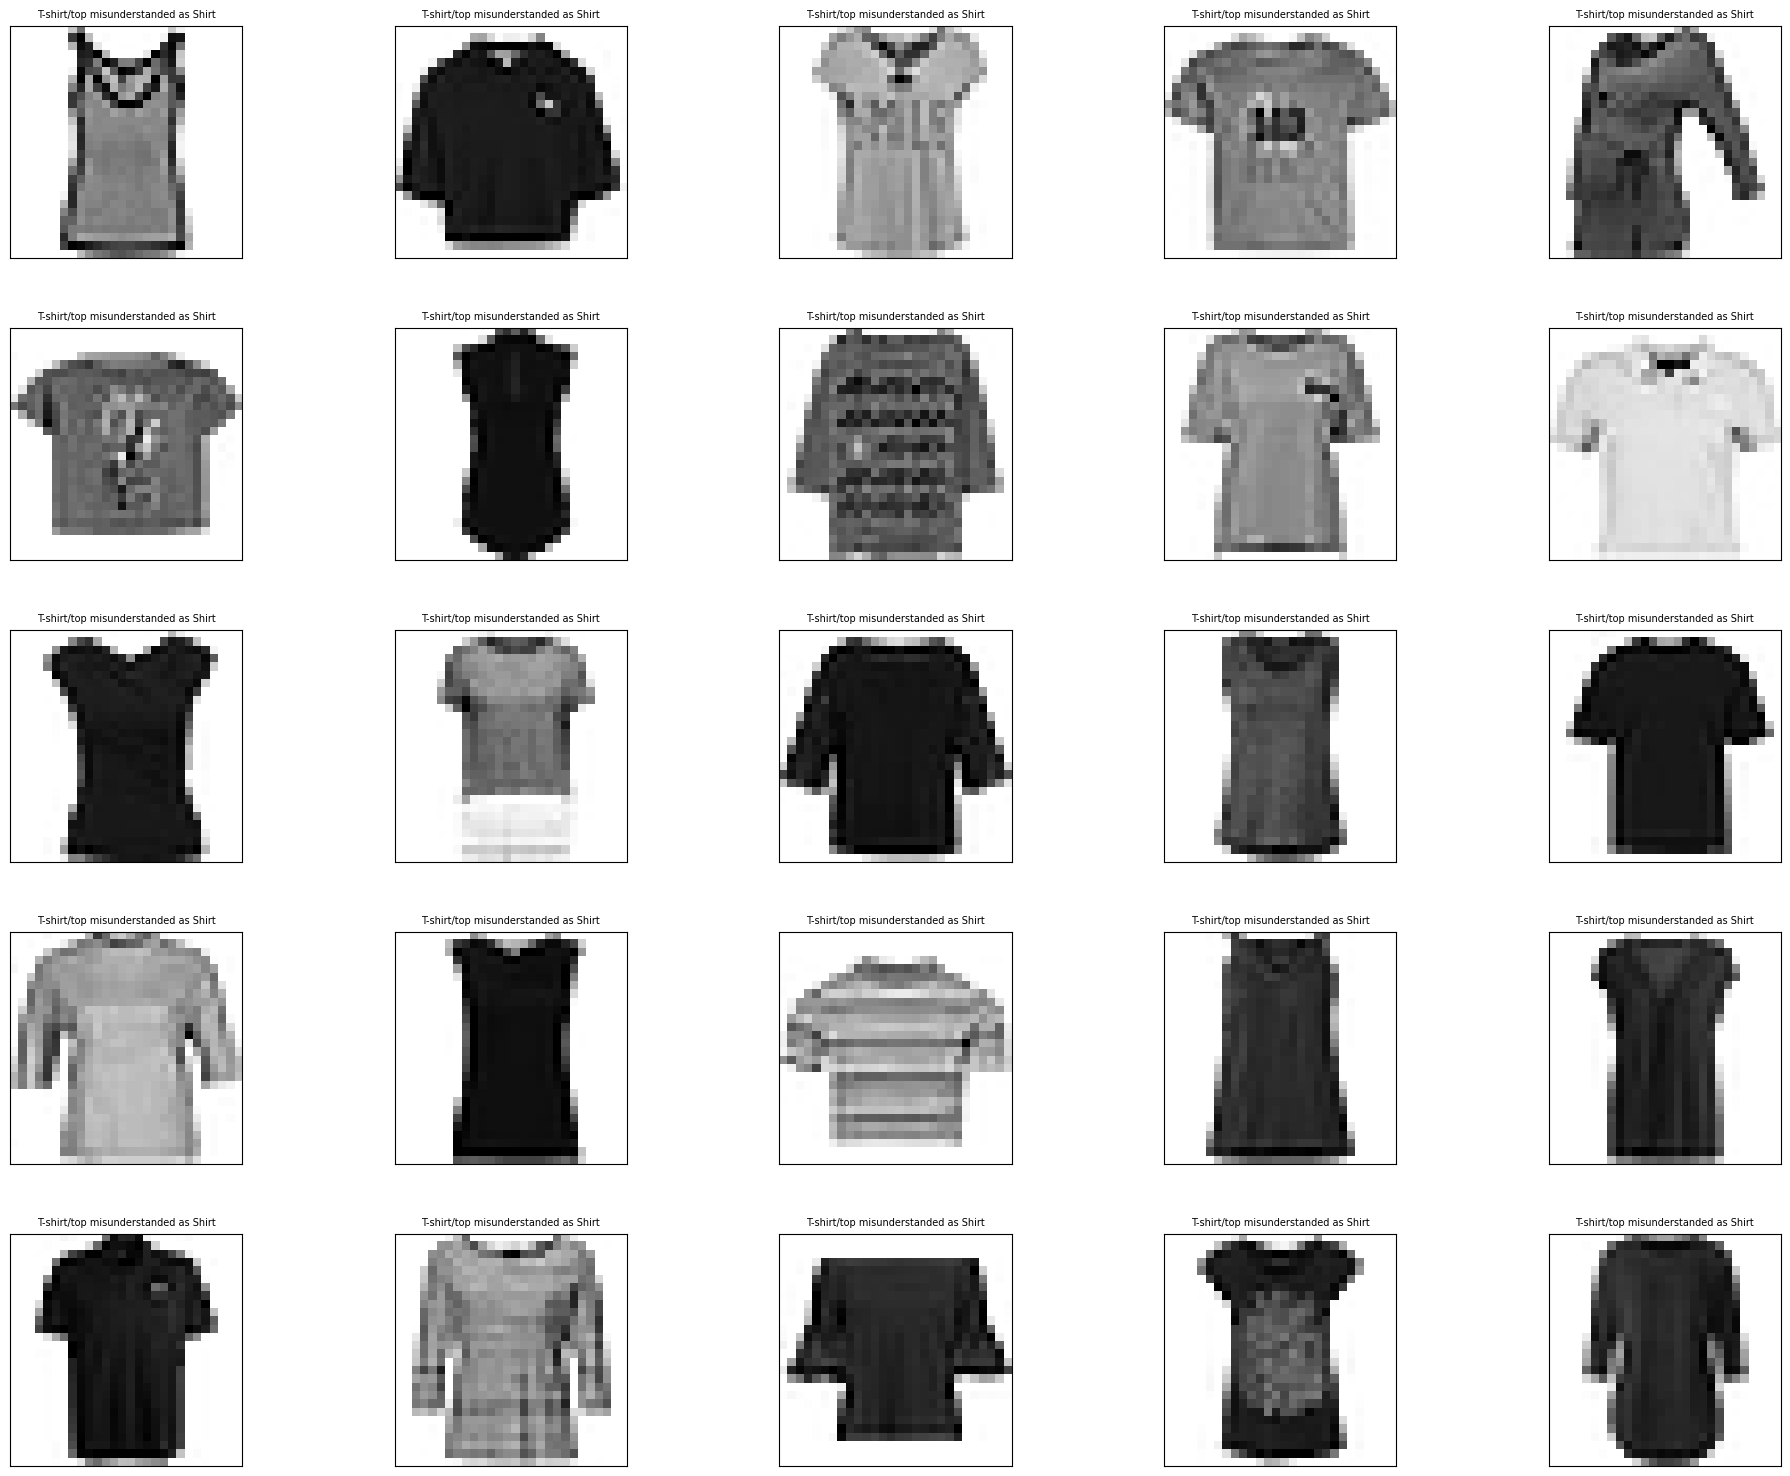

In [9]:
plt.figure()
index = 0
for i in range(len(X_test)):
    if y_probs[i] == 6 and Y_test[i] == 0:
        index+=1
        plt.subplot(5,5,index)
        plt.subplots_adjust(left=0.001, right=3, bottom=0.00001, top=3, wspace=0.01, hspace=0.3)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.array(X_test.iloc[i,:]).reshape(28,28),cmap=plt.cm.binary)
        plt.title("T-shirt/top misunderstanded as Shirt",fontsize=7)
        if index==25:
            break
plt.show()

Majorly these examples are originally T-shirt/top and wrongly classified as Shirt. 

Second: classify T-shirt/top as T-shirt/top

In [10]:
num = 0
for i in range(len(X_test)):
    if y_probs[i] == 0 and Y_test[i] == 0:
        num+=1
print(f"There are {num} numbers of T-shirt/top classified as T-Shirt/top.")

There are 788 numbers of T-shirt/top classified as T-Shirt/top.


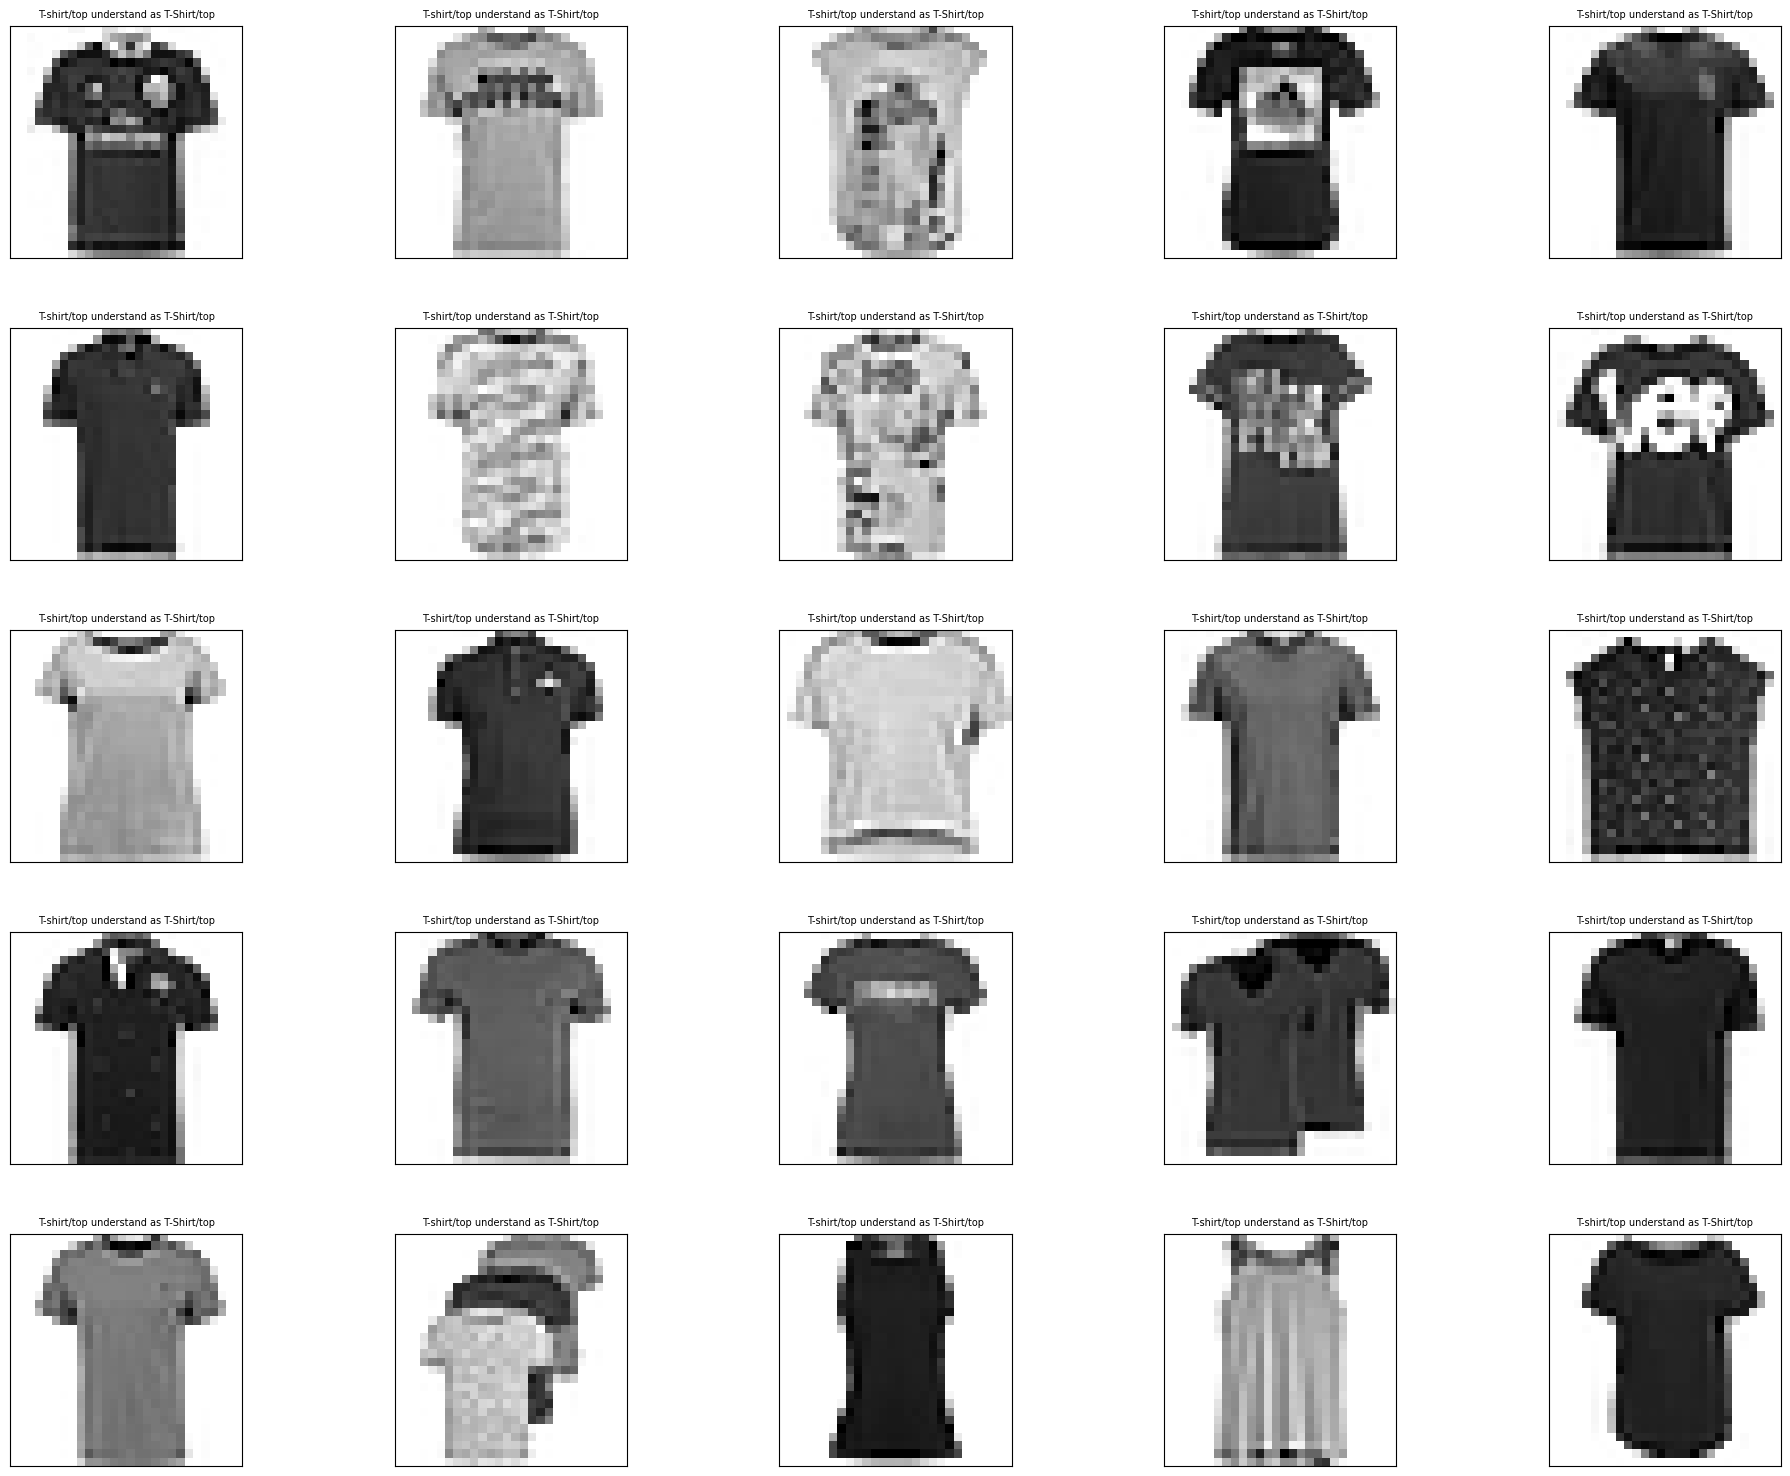

In [11]:
plt.figure()
index = 0
for i in range(len(X_test)):
    if y_probs[i] == 0 and Y_test[i] == 0:
        index+=1
        plt.subplot(5,5,index)
        plt.subplots_adjust(left=0.001, right=3, bottom=0.00001, top=3, wspace=0.01, hspace=0.3)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.array(X_test.iloc[i,:]).reshape(28,28),cmap=plt.cm.binary)
        plt.title("T-shirt/top understand as T-Shirt/top",fontsize=7)
        if index==25:
            break
plt.show()

These are just the examples that originally are T-shirt/top and classified as T-shirt/top.

In other words, it represents what T-shirt/top actually look like.

Third: classify Shirt as Shirt

In [12]:
num = 0
for i in range(len(X_test)):
    if y_probs[i] == 6 and Y_test[i] == 6:
        num+=1
print(f"There are {num} numbers of shirt classified as Shirt.")

There are 686 numbers of shirt classified as Shirt.


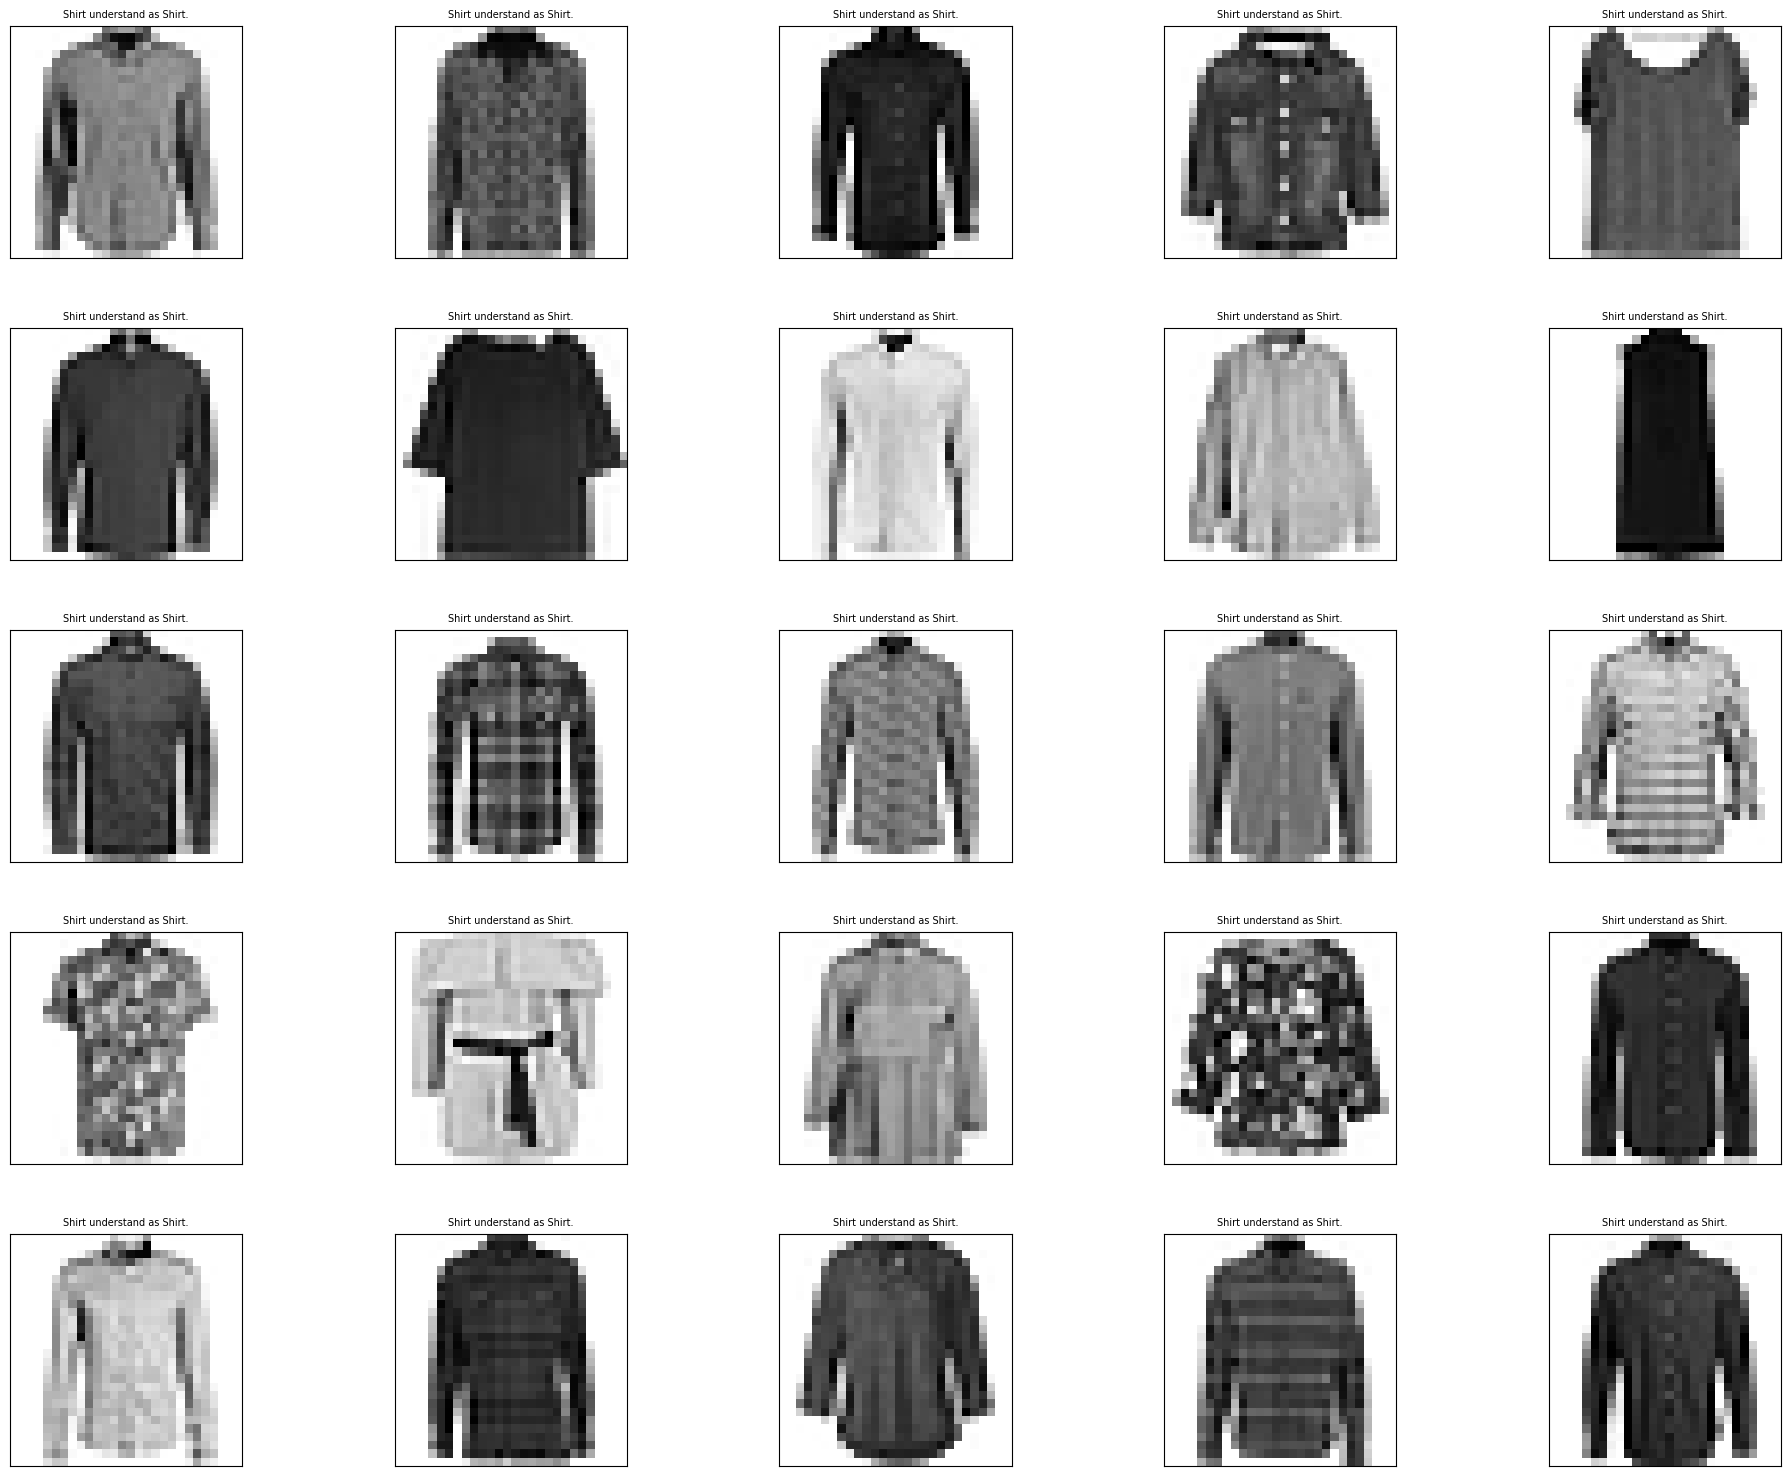

In [13]:
plt.figure()
index = 0
for i in range(len(X_test)):
    if y_probs[i] == 6 and Y_test[i] == 6:
        index+=1
        plt.subplot(5,5,index)
        plt.subplots_adjust(left=0.001, right=3, bottom=0.00001, top=3, wspace=0.01, hspace=0.3)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.array(X_test.iloc[i,:]).reshape(28,28),cmap=plt.cm.binary)
        plt.title("Shirt understand as Shirt.",fontsize=7)
        if index==25:
            break
plt.show()

Final Comment:

Now I have plotted three sets of fashion clothes, first set is those which are T-shirt/top misclassified as Shirt, second set is those which are T-shirt/top classified as T-shirt/top, and the third set is those which are Shirt classified as Shirt.

From the second and third set, it is obvious that T-shirt/top is those with short sleeves and Shirt is those with long sleeves.

So I think it is not reasonable that the model makes these misclassifications because in first set, there are still T-shirt/top with clear short sleeves.

I think It is not difficult for most examples because you can clearly judge whether it is short sleeve or long sleeve. But there are still some long sleeves T-shirt/top hard to tell by human eyes.

Those difficult examples with long sleeves are different compared to those correctly classified T-shirt/top, because they have relatively long sleeves as I mentioned.